In [119]:
#Read in an image into python usying OpenCv
#Grayscale and Blur
#Apply filtering,edge detection use contour search to find plates
#find edges for localization find contours and apply Mask
#Read  & Extract text using OCR with EasyOCR (Extract text from images)
#Render the Result

In [120]:
from matplotlib import pyplot as plt 
import numpy as np
import imutils
import easyocr
import cv2

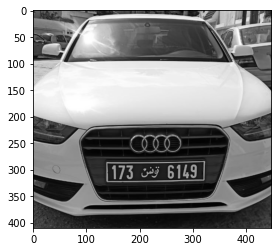

In [121]:
#Read in image, Grayscale and Blur
image=cv2.imread(r'C:\Users\PC\Desktop\carimg.png')
#convert BGR to Gray 
gray=cv2.cvtColor(image ,cv2.COLOR_BGR2GRAY)
#plot the image 
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

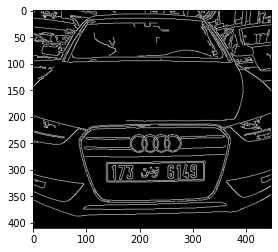

In [122]:
#Aplly filter and find edges for localization 
#Noise reduction
bfilter =cv2.bilateralFilter(gray , 11 ,17 ,17)
#Edge detection
#canny algorithm allow us to detect edges 
edged =cv2.Canny(bfilter, 30 ,200 )
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

In [123]:
#Find Countours and apply Mask 
#Find shapes (contours) return a tree and aproximate what the contour looks like 
#and store to a variable "keypoints"
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

contours= imutils.grab_contours(keypoints)
#return the top 10 contours
#sorted contour list
contours = sorted(contours, key=cv2.contourArea,reverse=True)[:10]

In [124]:
#filter around different countours in order to find our needed contour

loaction = None
for contour in contours:
    #cv2.approxPolydp allow to apporximate the polygon from our contours
    #10 : skip the little dents and specify its a straight line 
    approx=cv2.approxPolyDP(contour,10,True)
    #if there is 4 lines (Keypoints) its the location of the name plate that we needed 
    if len(approx)==4:
        location = approx
        break

In [125]:
location

array([[[323, 284]],

       [[138, 286]],

       [[137, 320]],

       [[318, 321]]], dtype=int32)

In [126]:
#blank mask same shape as the gray image
mask=np.zeros(gray.shape ,np.uint8)
#draw contour "location"
new_image=(cv2.drawContours(mask,[location],0,255,-1))
#over lay the mask over the original image 
new_image =cv2.bitwise_and(image,image,mask=mask)



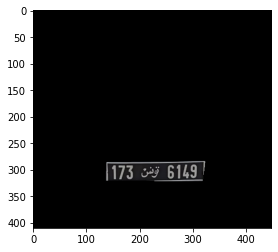

In [127]:
plt.imshow(cv2.cvtColor(new_image,cv2.COLOR_BGR2RGB))

In [128]:
#finding out every single section where our image isn't black
#and storing theme to variable x , y ... 
(x,y)= np.where(mask==255)
#get the max and the min of 
(minX,minY) =(np.min(x) ,np.min(y))
(maxX,maxY) =(np.max(x) ,np.max(y))
#adding +1 to get a little bit of buffer
processed_image=gray[minX:maxX+1 ,minY:maxY+1]
 

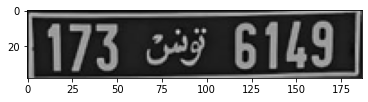

In [133]:
plt.imshow(cv2.cvtColor(processed_image,cv2.COLOR_BGR2RGB))

In [134]:
#Using Easy ocr to read text
#initilise  the reader 
reader = easyocr.Reader(['en'])
result= reader.readtext(processed_image)
result

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[([[0, 5], [59, 5], [59, 38], [0, 38]], '[173', 0.43034982681274414), ([[111, 3], [179, 3], [179, 38], [111, 38]], '6149', 0.8500772542960987), ([[62.98595974687321, 10.27613156968446], [102.64945770369195, 6.868943288896944], [104.0140402531268, 30.723868430315537], [64.35054229630805, 33.13105671110306]], 'U79', 0.1972187547135996)]


In [148]:
incrementation=result[0][-2]
incrementation=incrementation.replace('[',"")
nenregistrement=result[1][-2]
print("numéro d'incrémentation:",incrementation)
print("numéro d'enregistremen:",nenregistrement)

incrémentation: 173
numéro d'enregistremen: 6149
